In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

from tryagain import X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes
from tensorflow.keras.optimizers import Adam

%matplotlib inline
np.random.seed(1)

In [2]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [ ]:
                      """"
b001 = pd.read_table("C:/Users/yirimeah/Test_1a/Data/_b3001_data.txt",header=None)
                      """"

In [3]:
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

Y_train = convert_to_one_hot(Y_train_orig, 13).T
Y_test = convert_to_one_hot(Y_test_orig, 13).T

#Y_train = np.eye(13)[Y_train_orig.reshape(-1)].T
#Y_test = np.eye(13)[Y_test_orig.reshape(-1)].T

In [4]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 78
number of test examples = 26
X_train shape: (78, 30, 30, 1)
Y_train shape: (78, 13)
X_test shape: (26, 30, 30, 1)
Y_test shape: (26, 13)


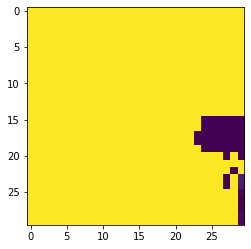

In [5]:
index = 12
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

In [6]:
def convolutional_model(input_shape):


    input_img = tf.keras.Input(shape=input_shape)

    Z1 = tf.keras.layers.Conv2D(8, (4, 4), strides = (1, 1), padding = 'same')(input_img)
    A1 = tf.keras.layers.ReLU()(Z1)
    P1 = tf.keras.layers.MaxPool2D(pool_size = (8, 8), strides = (8, 8), padding = 'same')(A1)
    Z2 = tf.keras.layers.Conv2D(16, (2, 2), strides = (1, 1), padding = 'same')(P1)
    A2 = tf.keras.layers.ReLU()(Z2)
    P2 = tf.keras.layers.MaxPool2D(pool_size = (4, 4), strides= (4, 4), padding = 'same')(A2)
    F = tf.keras.layers.Flatten()(P2)
    outputs = tf.keras.layers.Dense(units = 13, activation = 'softmax')(F)

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [7]:
conv_model = convolutional_model((30, 30, 1))
conv_model.compile(optimizer= Adam(0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30, 30, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 8)         136       
                                                                 
 re_lu (ReLU)                (None, 30, 30, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 8)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 16)          528       
                                                                 
 re_lu_1 (ReLU)              (None, 4, 4, 16)          0         
                                                             

In [8]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(30)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(30)

#history = conv_model.fit(x = X_train, y = Y_train, validation_data = (X_test, Y_test), epochs=500, batch_size=200)
history = conv_model.fit(train_dataset, epochs=200, validation_data=test_dataset)

Epoch 1/200
3/3 [==============================] - 1s 113ms/step - loss: 2.6073 - accuracy: 0.0769 - val_loss: 2.6305 - val_accuracy: 0.0769
Epoch 2/200
3/3 [==============================] - 0s 20ms/step - loss: 2.5866 - accuracy: 0.0769 - val_loss: 2.6166 - val_accuracy: 0.1154
Epoch 3/200
3/3 [==============================] - 0s 20ms/step - loss: 2.5709 - accuracy: 0.1026 - val_loss: 2.6045 - val_accuracy: 0.1154
Epoch 4/200
3/3 [==============================] - 0s 24ms/step - loss: 2.5587 - accuracy: 0.1154 - val_loss: 2.5946 - val_accuracy: 0.1154
Epoch 5/200
3/3 [==============================] - 0s 16ms/step - loss: 2.5483 - accuracy: 0.1538 - val_loss: 2.5865 - val_accuracy: 0.1154
Epoch 6/200
3/3 [==============================] - 0s 16ms/step - loss: 2.5385 - accuracy: 0.1667 - val_loss: 2.5793 - val_accuracy: 0.1154
Epoch 7/200
3/3 [==============================] - 0s 16ms/step - loss: 2.5299 - accuracy: 0.1795 - val_loss: 2.5728 - val_accuracy: 0.1154
Epoch 8/200
3/3 [==

3/3 [==============================] - 0s 16ms/step - loss: 1.7989 - accuracy: 0.7564 - val_loss: 2.1106 - val_accuracy: 0.3846
Epoch 60/200
3/3 [==============================] - 0s 16ms/step - loss: 1.7716 - accuracy: 0.7564 - val_loss: 2.0931 - val_accuracy: 0.3846
Epoch 61/200
3/3 [==============================] - 0s 16ms/step - loss: 1.7436 - accuracy: 0.7436 - val_loss: 2.0757 - val_accuracy: 0.3846
Epoch 62/200
3/3 [==============================] - 0s 12ms/step - loss: 1.7152 - accuracy: 0.7692 - val_loss: 2.0585 - val_accuracy: 0.3846
Epoch 63/200
3/3 [==============================] - 0s 12ms/step - loss: 1.6863 - accuracy: 0.7564 - val_loss: 2.0410 - val_accuracy: 0.3846
Epoch 64/200
3/3 [==============================] - 0s 12ms/step - loss: 1.6573 - accuracy: 0.7564 - val_loss: 2.0233 - val_accuracy: 0.3846
Epoch 65/200
3/3 [==============================] - 0s 12ms/step - loss: 1.6279 - accuracy: 0.7564 - val_loss: 2.0062 - val_accuracy: 0.4231
Epoch 66/200
3/3 [========

3/3 [==============================] - 0s 16ms/step - loss: 0.4831 - accuracy: 0.9615 - val_loss: 1.4088 - val_accuracy: 0.6538
Epoch 118/200
3/3 [==============================] - 0s 16ms/step - loss: 0.4720 - accuracy: 0.9615 - val_loss: 1.4051 - val_accuracy: 0.6538
Epoch 119/200
3/3 [==============================] - 0s 12ms/step - loss: 0.4612 - accuracy: 0.9615 - val_loss: 1.4022 - val_accuracy: 0.6538
Epoch 120/200
3/3 [==============================] - 0s 16ms/step - loss: 0.4508 - accuracy: 0.9615 - val_loss: 1.3986 - val_accuracy: 0.6538
Epoch 121/200
3/3 [==============================] - 0s 16ms/step - loss: 0.4409 - accuracy: 0.9615 - val_loss: 1.3955 - val_accuracy: 0.6538
Epoch 122/200
3/3 [==============================] - 0s 12ms/step - loss: 0.4311 - accuracy: 0.9615 - val_loss: 1.3937 - val_accuracy: 0.6538
Epoch 123/200
3/3 [==============================] - 0s 12ms/step - loss: 0.4215 - accuracy: 0.9615 - val_loss: 1.3921 - val_accuracy: 0.6538
Epoch 124/200
3/3 [=

Epoch 175/200
3/3 [==============================] - 0s 12ms/step - loss: 0.1703 - accuracy: 0.9615 - val_loss: 1.4132 - val_accuracy: 0.6923
Epoch 176/200
3/3 [==============================] - 0s 12ms/step - loss: 0.1679 - accuracy: 0.9615 - val_loss: 1.4153 - val_accuracy: 0.6923
Epoch 177/200
3/3 [==============================] - 0s 12ms/step - loss: 0.1657 - accuracy: 0.9615 - val_loss: 1.4173 - val_accuracy: 0.6923
Epoch 178/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1635 - accuracy: 0.9615 - val_loss: 1.4171 - val_accuracy: 0.6923
Epoch 179/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1613 - accuracy: 0.9615 - val_loss: 1.4176 - val_accuracy: 0.6923
Epoch 180/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1591 - accuracy: 0.9615 - val_loss: 1.4187 - val_accuracy: 0.6923
Epoch 181/200
3/3 [==============================] - 0s 12ms/step - loss: 0.1570 - accuracy: 0.9615 - val_loss: 1.4202 - val_accuracy: 0.6923
Epoch 

In [9]:
history.history

{'loss': [2.607323169708252,
  2.586627960205078,
  2.5709002017974854,
  2.5586960315704346,
  2.5482516288757324,
  2.5385029315948486,
  2.5298590660095215,
  2.522015333175659,
  2.514770030975342,
  2.507982015609741,
  2.5013797283172607,
  2.4946229457855225,
  2.4879064559936523,
  2.4811925888061523,
  2.4743008613586426,
  2.4673008918762207,
  2.4602901935577393,
  2.4532086849212646,
  2.44575572013855,
  2.4378254413604736,
  2.429818630218506,
  2.421543598175049,
  2.4131290912628174,
  2.4044668674468994,
  2.395587921142578,
  2.386509656906128,
  2.3769938945770264,
  2.3671562671661377,
  2.3570408821105957,
  2.3465046882629395,
  2.3355355262756348,
  2.3242263793945312,
  2.312734365463257,
  2.3006911277770996,
  2.287992000579834,
  2.274951934814453,
  2.261186361312866,
  2.2468926906585693,
  2.2321434020996094,
  2.216702699661255,
  2.200737714767456,
  2.184330940246582,
  2.1673991680145264,
  2.149909496307373,
  2.1316189765930176,
  2.112478494644165,


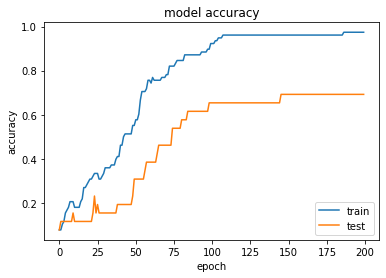

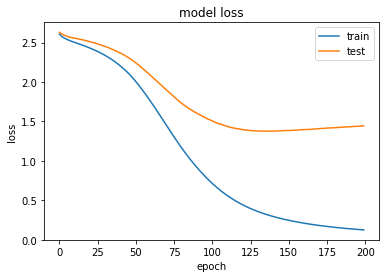

In [10]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.savefig("D:\\BLE_RSSI_dataset\\accuracy.jpeg")
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig("D:\\BLE_RSSI_dataset\\loss.jpeg")
plt.show()

In [11]:
import tensorflow as tf
import numpy as np
import scipy.misc
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.python.framework.ops import EagerTensor
from matplotlib.pyplot import imshow

%matplotlib inline

In [12]:
def identity_block(X, f, filters, training=True, initializer=random_uniform):

    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = 1, strides = (1,1), padding = 'valid', kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization(axis = 3)(X, training = training) # Default axis
    X = Activation('relu')(X)

    ## Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = f, strides = (1, 1), padding ='same', kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization(axis = 3)(X, training = training)
    X = Activation('relu')(X)

    ## Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = 1, strides = (1, 1), padding = 'valid', kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization(axis = 3)(X, training = training) 
    
    ## Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [13]:
def convolutional_block(X, f, filters, s = 2, training=True, initializer=glorot_uniform):
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    # First component of main path glorot_uniform(seed=0)
    X = Conv2D(filters = F1, kernel_size = 1, strides = (s, s), padding='valid', kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization(axis = 3)(X, training=training)
    X = Activation('relu')(X)

    ### START CODE HERE
    
    ## Second component of main path
    X = Conv2D(filters = F2, kernel_size = f, strides = (1, 1), padding='same', kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization(axis = 3)(X, training=training)
    X = Activation('relu')(X) 

    ## Third component of main path 
    X = Conv2D(filters = F3, kernel_size = 1, strides = (1, 1), padding='valid', kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization(axis = 3)(X, training = training)
    
    ##### SHORTCUT PATH ##### 
    X_shortcut = Conv2D(filters = F3, kernel_size = 1, strides = (s, s), padding = 'valid', kernel_initializer = initializer(seed =0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3)(X_shortcut, training = training)


    # Final step: Add shortcut value to main path (Use this order [X, X_shortcut]), and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

In [14]:
def ResNet50(input_shape = (30, 30, 1), classes = 13):

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = Conv2D(30, (7, 7), strides = (2, 2), kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [30, 30, 120], s = 1)
    X = identity_block(X, 3, [30, 30, 120])
    X = identity_block(X, 3, [30, 30, 120])

    
    ## Stage 3 (≈4 lines)
    X = convolutional_block(X, f = 3, filters = [120, 120, 480], s = 2)
    X = identity_block(X, 3, [120, 120, 480])
    X = identity_block(X, 3, [120, 120, 480])
    X = identity_block(X, 3, [120, 120, 480])
    
    ## Stage 4 (≈6 lines)
    X = convolutional_block(X, f = 3, filters = [120, 120, 480], s = 2)
    X = identity_block(X, 3, [120, 120, 480]) 
    X = identity_block(X, 3, [120, 120, 480])  
    X = identity_block(X, 3, [120, 120, 480])  
    X = identity_block(X, 3, [120, 120, 480])  
    X = identity_block(X, 3, [120, 120, 480]) 

    ## Stage 5 (≈3 lines)
    X = convolutional_block(X, f = 3, filters = [240, 240, 960], s = 2) 
    X = identity_block(X, 3, [240, 240, 960]) 
    X = identity_block(X, 3, [240, 240, 960]) 

    ## AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D(1, 1)(X) 


    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X)

    return model

In [15]:
model = ResNet50(input_shape = (30, 30, 1), classes = 13)
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 30, 30, 1)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 36, 36, 1)   0           ['input_2[0][0]']                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 15, 15, 30)   1500        ['zero_padding2d[0][0]']         
                                                                                                  
 batch_normalization (BatchNorm  (None, 15, 15, 30)  120         ['conv2d_2[0][0]']               
 alization)                                                                                 

In [16]:
model.compile(optimizer= Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
hist = model.fit(X_train, Y_train, epochs = 20, batch_size = 200)
#hist = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=20, batch_size=32)

Epoch 1/20
1/1 [==============================] - 6s 6s/step - loss: 3.6283 - accuracy: 0.0897
Epoch 2/20
1/1 [==============================] - 0s 228ms/step - loss: 2.8212 - accuracy: 0.2051
Epoch 3/20
1/1 [==============================] - 0s 232ms/step - loss: 1.4592 - accuracy: 0.5641
Epoch 4/20
1/1 [==============================] - 0s 222ms/step - loss: 0.7214 - accuracy: 0.7179
Epoch 5/20
1/1 [==============================] - 0s 214ms/step - loss: 0.3066 - accuracy: 0.9359
Epoch 6/20
1/1 [==============================] - 0s 213ms/step - loss: 0.0916 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 217ms/step - loss: 0.0395 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 209ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 217ms/step - loss: 0.0130 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 224ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 11/20
1/1 [=====

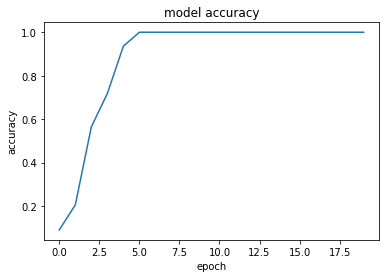

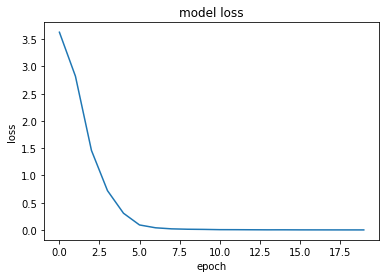

In [20]:
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.savefig("D:\\BLE_RSSI_dataset\\accuracy2.jpeg")
plt.show()

plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.savefig("D:\\BLE_RSSI_dataset\\loss2.jpeg")
plt.show()

In [21]:
preds = model.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 0s 72ms/step - loss: 1.8754 - accuracy: 0.6154
Loss = 1.8753855228424072
Test Accuracy = 0.6153846383094788
